# DATA 311 - Lecture 4: Probability and Statistics; Summary Statistics

## Announcements

* Lab 2 (and Pre-Lab) is posted on the course webpage. Fun with Pandas!
* Our first Data Ethics assignment is out; due Wednesday before class. You will:
  * Download all the data that some tech company has on you
  * Poke around
  * Write a short reflection
  * Discuss in class on Wednesday

## Goals

* Develop intuition for the purpose of, and distinction between, *probability* and *statistics* (Skiena 2.1.1)
* Know the terminology and properties of basic probability (Skiena 2.1):
  * Experiment; Outcome; Sample Space; Event; Probability; Random Variable; Expected Value
* Know how to compute and interpret basic summary statistics (Skiena 2.2):
  * Centrality measures: Arithmetic mean, Geometric Mean, Median, (Mode)
  * Variability measures: Standard Deviation, Variance

* Know how to compute summary statistics in pandas.

## Probability and Statistics

What are these words? What is the purpose of each? What's the difference between the two?

Probability is a set of tools for describing a **model** of how the world (or some process in the world) behaves.

Statistics gives us a set of tools for *estimating* such a model, or for *verifying* or *evaluating* a hypothesized model, given observations of how the world behave**d**.

### Probability - Basics
* Probability is actually hard to define! But easy to have intuition about it.
* Also straightforward to write down its properties (i.e., how it *behaves*)

First, need some terminology.
* An **experiment** is a process that results in one of a set of possible outcomes.
* The **sample space** ($S$) of the experiment is the set of all possible outcomes.
* An event ($E$) is a subset of the outcomes.
* The **probability** of an outcome $s$ is written $P(s)$ and has these properties:
  * $P(s)$ is between 0 and 1: $0 \le P(s) \le 1$.
  * The sum of probabilities of all outcomes is exactly 1: $$\sum_{s \in S} P(s) = 1$$
  
* A **random variable** $(V)$ is a function that maps an outcome to a number.
* The **expected value** $E(V)$ of a random variable $V$ is the sum of the probability of each outcome times the random variable's value at that outcome: $$E(V) = \sum_{s \in S} P(s) \cdot V(s)$$

If we run an **experiment** where we toss a fair coin, the **sample space** contains the outcomes ${H, T}$ representing heads and tails. The coin is fair, so the **probability** of each outcome is 0.5, which satisfies both of the properties above.

Suppose you made a deal with a friend to toss a coin, and if it comes up heads, your friend gives you a dollar. If it comes up tails, no money changes hands. The **random variable** $V$ that's relevant to your wallet is $V(H) = 1, V(T) = 0$. The **expected value** of this random variable is $V(H) * P(H) + V(T) * P(T) = 0.5$, which you can think of as the amount of money you would expect to earn per flip, on average, if you repeated this experiment many, many times.

**Exercise:** describe the rolling of a six-sided die using the same terminology as above. For a random variable, use the number on the die itself; find the expected value.

**Exercise for later**: Do the same as above for a roll of *two* six-sided dice, and calculated the expected value of the random variable that is the *sum* of the numbers that the two dice land on.

#### Probability Distributions

The expected value is one important property of a random variable, but if we want the whole story, we need to look at its **probability density function** (PDF): a graph with random variable's values on the $x$ axis and the probability of the random variable taking on that value on the $y$ axis.

Here's the PDF of the random variable described above:

Text(0, 0.5, 'P(s)')

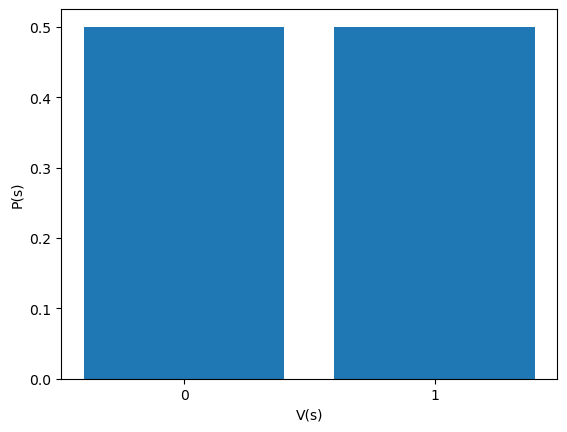

In [30]:
import matplotlib.pyplot as plt
plt.bar(["0", "1"], [0.5, 0.5])
plt.xlabel("V(s)")
plt.ylabel("P(s)")

**Exercise:** Draw the PDF for a loaded **five**-sided die that comes up 1 with probability 0.6 and has an equal chance of each the remaining four faces.

### Statistics

We can think of a set of data as the outcome of one or more experiments; statistics give us tools to describe the properties of the data and, eventually, estimate how the underlying experiment behaves. For now, we'll talk about **summary statistics**, which provide aggregate descriptions of a data set. For now, let's assume we have a single numerical column of a table - say, the Height column of a dataset of measurements of people.

#### Histograms
**Histograms** are the statistical equivalent of probability density functions. They show the observed frequency of a certain outcome. For example, here's the histogram describing the result of flipping a coin ten times.

<BarContainer object of 2 artists>

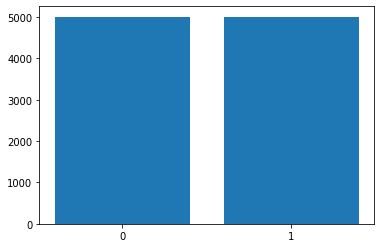

In [3]:
import random
N = 10000
outcomes = []
for i in range(N):
    outcomes.append(random.choice(("H", "T")))
#print(outcomes)

n_heads = 0
n_tails = 0
for out in outcomes:
    if out == "H":
        n_heads += 1
    if out == "T":
        n_tails += 1

plt.bar(["0", "1"], [n_tails, n_heads])

The histogram is a direct analogue to the probability distribution function. In fact, we can convert it to an **empirical** PDF by dividing by the number of trials:

<BarContainer object of 2 artists>

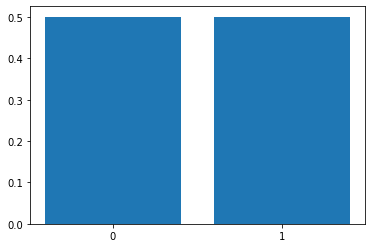

In [4]:
plt.bar(["0", "1"], [n_heads / N, n_tails / N])

Notice that only the $y$ axis scale changed. This is an estimate of the PDF based on the data we observed.

### Summary Statistics

Real-world experiments of interest are more complicated - more complicated processes, more complicated sets of outcomes, etc. It's often useful to summarize the salient properties of an observed distribution. For this, we use **summary statistics**.

#### Central Tendency Measures
These tell you something about where the data is "centered".

**(Arithmetic) Mean**, aka "average": The sum of the values divided by the number of values: $$\mu_X = \frac{1}{n} \sum_{i=1}^n x_i$$.

This works well for data sets where there aren't many outliers; for example: the average height of a female American is 5 feet 4 inches.

**Geometric Mean**: The $n$th root of the product of $n$ values: $$\left(\prod_{i=1}^n a_i\right)^\frac{1}{n}$$

This is a weird one, and not as often applicable. If you have a single zero, the geometric mean is zero. But it's useful for measuring the central tendency of a collection of **ratios**.

**Median**: The middle value - the element appearing exaclty in the middle if the data were sorted. This is useful in the presence of **outliers** or more generally when the distribution is weirdly-shaped.

**\*-iles**

These generalize the median to fractions other than one half. For example, the five quartiles of a dataset are the minimum, the value that is larger than one quarter of the data, the median, the value that is larger than three quarters of the data, and the maximum.

Common examples aside from quartiles include percentiles (divide the data into 100ths), deciles (10ths), and quintiles (fifths).

#### Variability Measures
These tell you something about the *spread* of the data, i.e., how far measurements tend to be from the center.

**Standard Deviation** ($\sigma$): The square root of the sum of squared differences between the elements and the mean: $$\sqrt{\frac{\sum_{i=1}^n (a_i - \bar{a})^2}{n-1}}$$

**Variance**: the square of the Standard Deviation (i.e., same thing without the square root).

Variance is easier to intuit: it's the average sqaured distance from the mean, with a small caveat that it's divided by n-1 rather than by n.



## Summary Statistics in Pandas

There are built-in functions that do all of the above for us. To demo, we'll use a dataset of body measurements from a sample of humans.

In [33]:
import pandas as pd

Load the data and do a little tidying:

In [34]:
url = 'https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_25f/data/NHANES/NHANES.csv'
df = pd.read_csv(url).rename(
   columns={"SEQN": "SEQN",
            "RIAGENDR": "Gender", # 1 = M, 2 = F
            "RIDAGEYR": "Age", # years
            "BMXWT": "Weight", # kg
            "BMXHT": "Height", # cm
            "BMXLEG": "Leg", # cm
            "BMXARML": "Arm", # cm
            "BMXARMC": "Arm Cir", # cm
            "BMXWAIST": "Waist Cir"} # cm
)
df

SEQN  Gender   Age  Weight  Height   Leg   Arm  Arm Cir  Waist Cir
0      93703.0     2.0   2.0    13.7    88.6   NaN  18.0     16.2       48.2
1      93704.0     1.0   2.0    13.9    94.2   NaN  18.6     15.2       50.0
2      93705.0     2.0  66.0    79.5   158.3  37.0  36.0     32.0      101.8
3      93706.0     1.0  18.0    66.3   175.7  46.6  38.8     27.0       79.3
4      93707.0     1.0  13.0    45.4   158.4  38.1  33.8     21.5       64.1
...        ...     ...   ...     ...     ...   ...   ...      ...        ...
8699  102952.0     2.0  70.0    49.0   156.5  34.4  32.6     25.1       82.2
8700  102953.0     1.0  42.0    97.4   164.9  38.2  36.6     40.6      114.8
8701  102954.0     2.0  41.0    69.1   162.6  39.2  35.2     26.8       86.4
8702  102955.0     2.0  14.0   111.9   156.6  39.2  35.0     44.5      113.5
8703  102956.0     1.0  38.0   111.5   175.8  42.5  38.0     40.0      122.0

[8704 rows x 9 columns]

<Axes: ylabel='Frequency'>

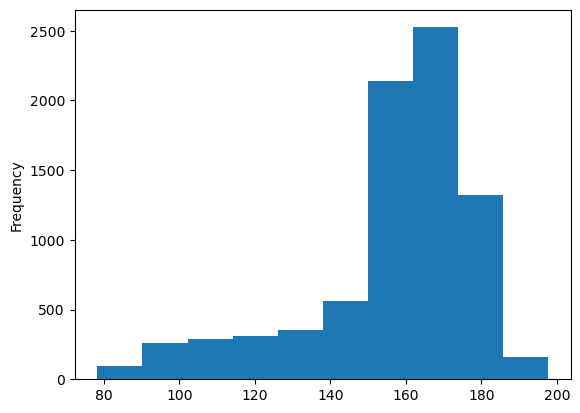

In [35]:
df["Height"].plot.hist()

We can see the names and datatypes of all the columns with `info`:

To compute a useful collection of summary statistics on each column, we can use `describe`:

Let's poke around! Some ideas:
* `mean`, `median`, `min`, `max` per column
* `.plot.hist` per column
* Perform some unit conversions
* Extract a subset of rows meeting a criterion